In [1]:
# FURB 2024.2 - Processamento de Imagens - Trabalho 1 - Operadores Morfológicos
# Alunos: Leonardo Gian Pottmayer e Rael dos Santos Nehring

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Função para exibir uma imagem com título.
def show_image(title, img, debugFileName):
    plt.figure("FURB 2024.2 - Processamento de Imagens - Trabalho 1 - Operadores Morfológicos")
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
    cv2.imwrite(f'images/debug/{debugFileName}', img)

# Função para limpar o diretório images/debug.
def clear_debug_folder():
    debug_dir = 'images/debug'

    if not os.path.exists(debug_dir):
        os.makedirs(debug_dir)

    for f in os.listdir(debug_dir):
        os.remove(os.path.join(debug_dir, f))

# Limpar a pasta de depuração.
clear_debug_folder()

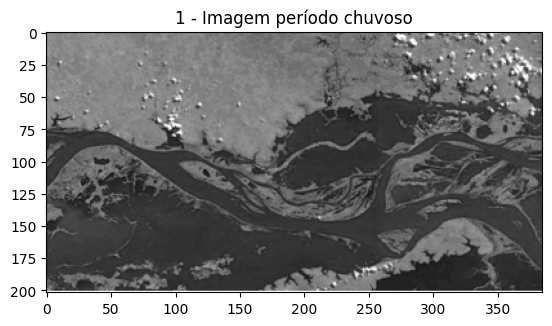

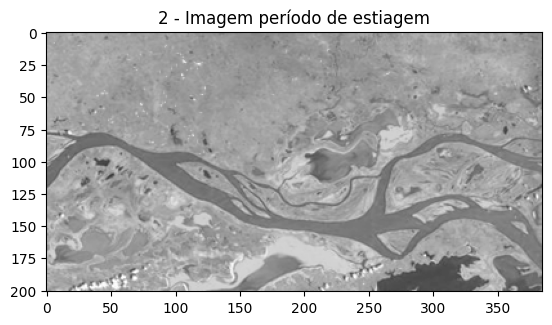

In [2]:
# ----- PREPARAÇÃO DAS IMAGENS -----

# Carregar as imagens originais, já convertendo para escala de cinza.
raw_image_rainy = cv2.imread('images/raw/chuvoso.png', cv2.IMREAD_GRAYSCALE)
raw_image_dry = cv2.imread('images/raw/estiagem.png', cv2.IMREAD_GRAYSCALE)

show_image('1 - Imagem período chuvoso', raw_image_rainy, '1 - Imagem período chuvoso.png')
show_image('2 - Imagem período de estiagem', raw_image_dry, '2 - Imagem período de estiagem.png')

# Redimensionar imagens para ambas terem o mesmo tamanho.
height, width = raw_image_rainy.shape[:2]
raw_image_dry = cv2.resize(raw_image_dry, (width, height))

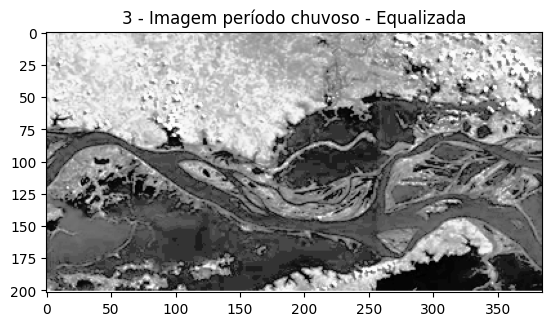

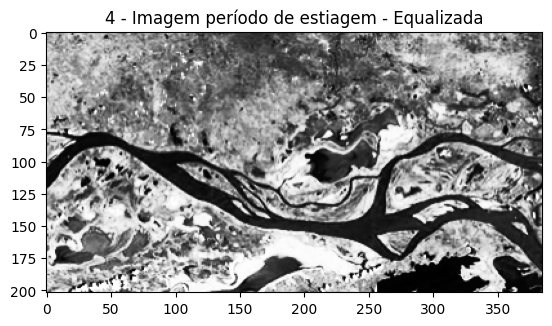

In [3]:
# ----- PROCESSAMENTO DA IMAGEM -----

# Ajustar o contraste utilizando equalização do histograma. Destaca mais os brancos e pretos da imagem.
equalized_image_rainy = cv2.equalizeHist(raw_image_rainy)
equalized_image_dry = cv2.equalizeHist(raw_image_dry)

show_image('3 - Imagem período chuvoso - Equalizada', equalized_image_rainy, '3 - Imagem período chuvoso - Equalizada.png')
show_image('4 - Imagem período de estiagem - Equalizada', equalized_image_dry, '4 - Imagem período de estiagem - Equalizada.png')

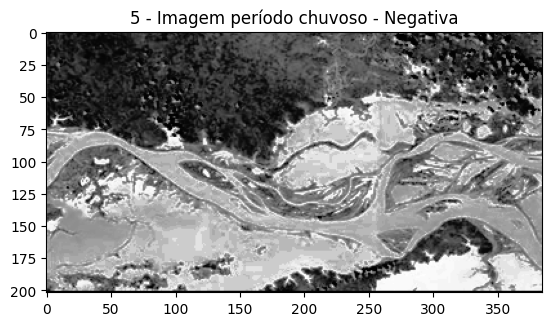

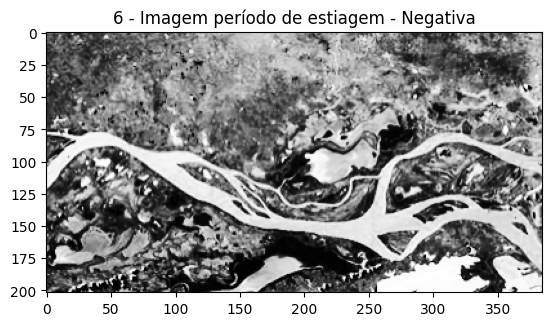

In [4]:
# Passo 1: Imagem negativa.
image_rainy_neg = cv2.bitwise_not(equalized_image_rainy)
image_dry_neg = cv2.bitwise_not(equalized_image_dry)

show_image('5 - Imagem período chuvoso - Negativa', image_rainy_neg, '5 - Imagem período chuvoso - Negativa.png')
show_image('6 - Imagem período de estiagem - Negativa', image_dry_neg, '6 - Imagem período de estiagem - Negativa.png')

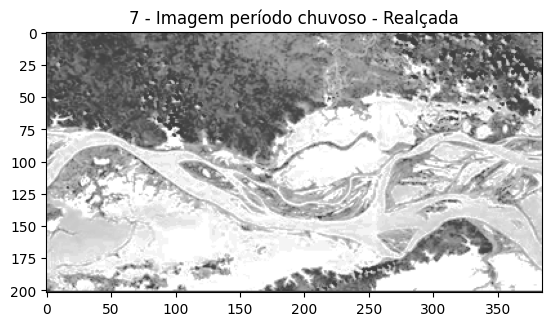

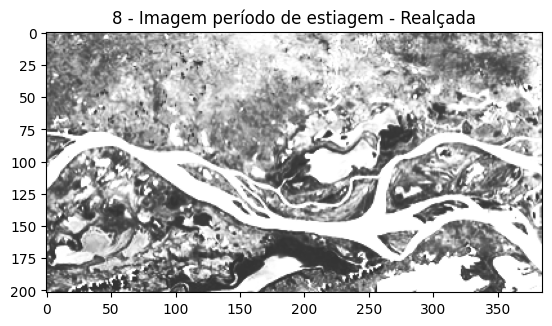

In [5]:
# Passo 2: Pré-Processamento Morfológico (Etapa de realce).
# Incrementar o brilho nas duas imagens.
image_rainy_enhanced = cv2.add(image_rainy_neg, 60)
image_dry_enhanced = cv2.add(image_dry_neg, 50)

show_image('7 - Imagem período chuvoso - Realçada', image_rainy_enhanced, '7 - Imagem período chuvoso - Realçada.png')
show_image('8 - Imagem período de estiagem - Realçada', image_dry_enhanced, '8 - Imagem período de estiagem - Realçada.png')

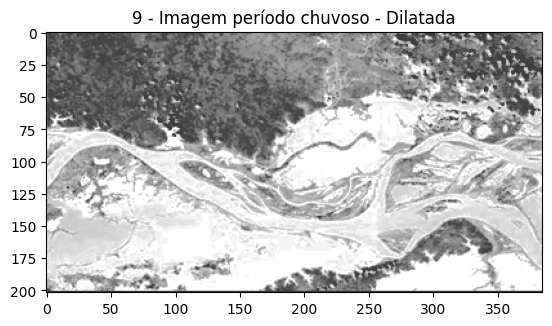

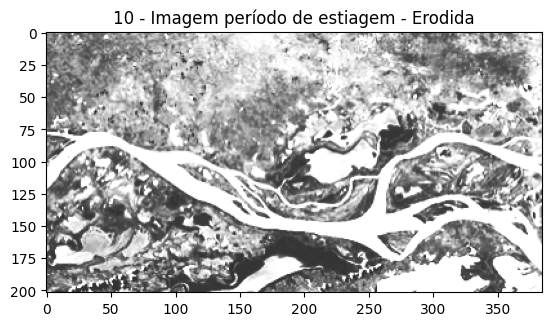

In [6]:
kernel = np.ones((1, 1), np.uint8)

# Aplicar dilatação na imagem do período chuvoso e erosão na imagem do período de estiagem.
image_rainy_dilated = cv2.dilate(image_rainy_enhanced, kernel, iterations=1)
image_dry_eroded = cv2.erode(image_dry_enhanced, kernel, iterations=5)

show_image('9 - Imagem período chuvoso - Dilatada', image_rainy_dilated, '9 - Imagem período chuvoso - Dilatada.png')
show_image('10 - Imagem período de estiagem - Erodida', image_dry_eroded, '10 - Imagem período de estiagem - Erodida.png')

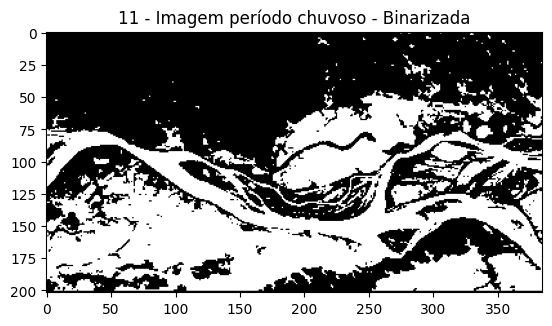

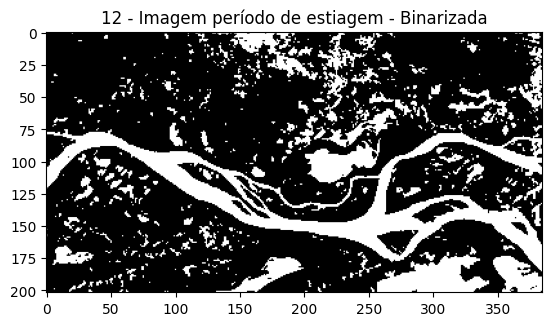

In [7]:
# Passo 3: Binarização.
binary_rainy_thresh = 205
binary_dry_thresh = 240

_, binary_rainy = cv2.threshold(image_rainy_dilated, binary_rainy_thresh, 255, cv2.THRESH_BINARY)
_, binary_dry = cv2.threshold(image_dry_eroded, binary_dry_thresh, 255, cv2.THRESH_BINARY)

show_image('11 - Imagem período chuvoso - Binarizada', binary_rainy, '11 - Imagem período chuvoso - Binarizada.png')
show_image('12 - Imagem período de estiagem - Binarizada', binary_dry, '12 - Imagem período de estiagem - Binarizada.png')

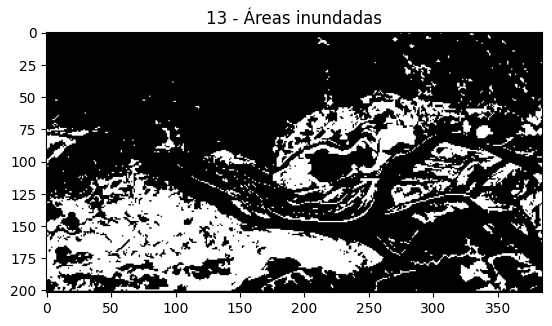

In [8]:
# Subtração das imagens binarizadas para identificar inundações.
flooded_areas = cv2.subtract(binary_rainy, binary_dry)
show_image('13 - Áreas inundadas', flooded_areas, '13 - Áreas inundadas.png')

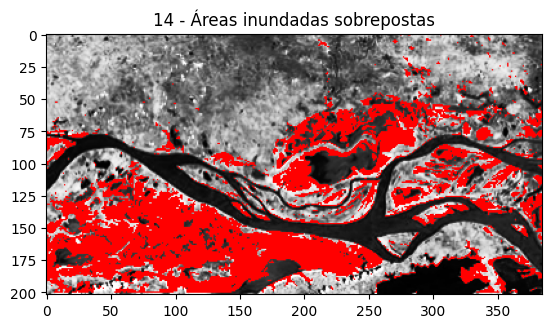

In [9]:
# Converter a imagem de estiagem para colorida para sobrepor as áreas inundadas.
image_colored_dry = cv2.cvtColor(equalized_image_dry, cv2.COLOR_GRAY2BGR)

# Criar uma imagem vermelha do mesmo tamanho das outras.
red = np.zeros_like(image_colored_dry)
red[:, :] = [0, 0, 255]  # BGR para vermelho (0 azul, 0 verde e 255 vermelho).

# Aplicar as áreas inundadas (branco na binarização) sobre a imagem de estiagem em vermelho.
flood_mask = flooded_areas == 255
overlapping_dry = np.where(flood_mask[:, :, None], red, image_colored_dry)

show_image('14 - Áreas inundadas sobrepostas', overlapping_dry, '14 - Áreas inundadas sobrepostas.png')

In [10]:
# Cálculo da área inundada.
flooded_area_pixels = np.sum(flooded_areas == 255)
print(f'Área inundada em pixels: {flooded_area_pixels}')


Área inundada em pixels: 19134
